### Аппроксимация сложной функции

In [26]:
from __future__ import division

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import linalg

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [10]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

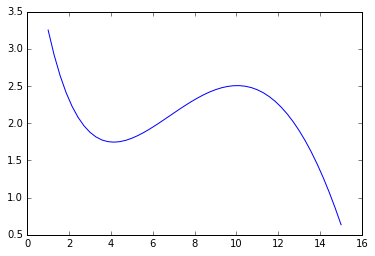

In [15]:
grid = np.linspace(1.0, 15.0, num=50)
plt.plot(grid, f(grid))

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [49]:
matrix_A = np.array(([1, 1], [1, 15]))
vector_B = np.array([f(1), f(15)])

print matrix_A
print vector_B

[[ 1  1]
 [ 1 15]]
[ 3.25221687  0.63522142]


In [33]:
w = linalg.solve(matrix_A, vector_B)

array([[ 3.43914511],
       [-0.18692825]])

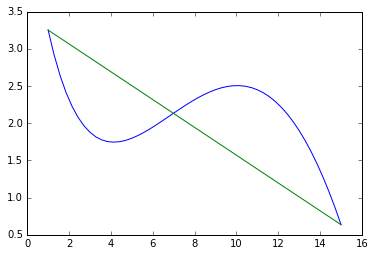

In [34]:
grid = np.linspace(1.0, 15.0, num=50)
plt.plot(grid, f(grid))
plt.plot(grid, w[0] + w[1]*grid)

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [48]:
matrix_A = np.array(([1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]))
vector_B = np.array([f(1), f(8), f(15)])

w = linalg.solve(matrix_A, vector_B)

print matrix_A
print vector_B

[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
[ 3.25221687  2.31617016  0.63522142]


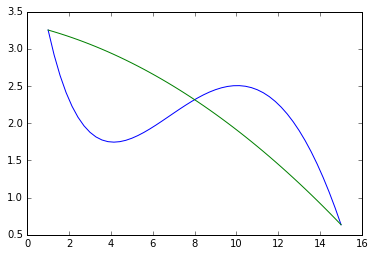

In [42]:
grid = np.linspace(1.0, 15.0, num=50)
plt.plot(grid, f(grid))
plt.plot(grid, w[0] + w[1]*grid + w[2]*(grid**2))

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [46]:
matrix_A = np.array(([1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]))
vector_B = np.array([f(1), f(4), f(10), f(15)])

w = linalg.solve(matrix_A, vector_B)

print matrix_A
print vector_B

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
[ 3.25221687  1.74684595  2.50541641  0.63522142]


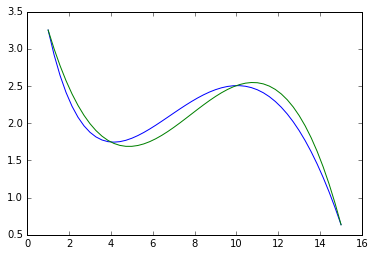

In [47]:
grid = np.linspace(1.0, 15.0, num=50)
plt.plot(grid, f(grid))
plt.plot(grid, w[0] + w[1]*grid + w[2]*(grid**2) + w[3]*(grid**3))

### Аппроксимация Лагранжа

In [50]:
x = [1.0, 3.0, 5.0]

In [56]:
np.vander(x, increasing=True)

array([[  1.,   1.,   1.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.]])

In [57]:
def lagrange_approximate(f, x):
    A = np.vander(x, increasing=True)
    b = f(x)
    w = linalg.solve(A, b)
    return np.polynomial.Polynomial(w)

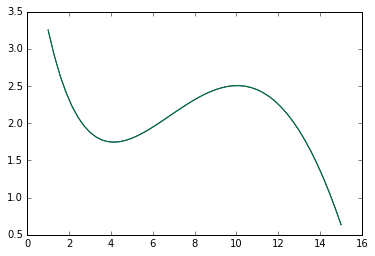

In [74]:
f_hat = lagrange_approximate(f, np.linspace(1.0, 15.0, num=20))
grid = np.linspace(1.0, 15.0, num=50)
plt.plot(grid, f(grid))
plt.plot(grid, f_hat(grid))

(-2.0, 2.0)

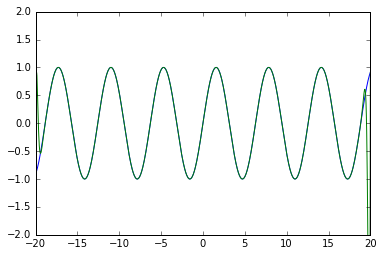

In [100]:
f_hat = lagrange_approximate(np.sin, np.linspace(-20.0, 20.0, num=70))
grid = np.linspace(-20.0, 20.0, num=1000)
plt.plot(grid, np.sin(grid))
plt.plot(grid, f_hat(grid))
plt.ylim(-2.0, 2.0)